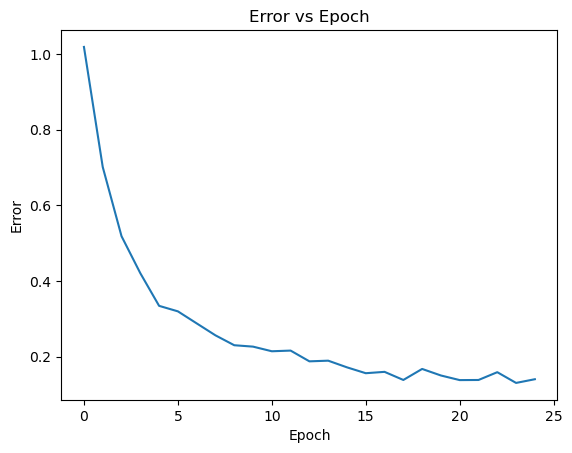

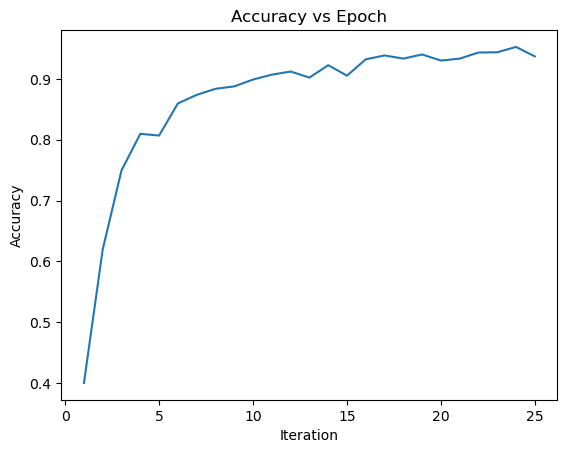

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import os
import numpy as np

image_arrays = []
image_label = []

for i in range (10):

    image_directory = '/kaggle/input/spider-ml-inductions-2023-task-1-part-1/trainingSet/trainingSet/{}'.format(i)
 
    for filename in os.listdir(image_directory):
        file_path = os.path.join(image_directory, filename)
        image = Image.open(file_path)
        image_array = np.array(image)
        image_arrays.append(image_array)
        image_label.append(i)


image_label = np.array(image_label)    
image_arrays = np.array(image_arrays)

# training data
x_train = image_arrays
y_train = image_label

image_label_arrays=[]

image_directory = '/kaggle/input/spider-ml-inductions-2023-task-1-part-1/test_set/test'
 
for filename in os.listdir(image_directory):
    file_path = os.path.join(image_directory, filename)
    image = Image.open(file_path)
    image_label_array = np.array(image)
    image_label_arrays.append(image_label_array)
        
x_test=image_label_arrays
errors=[]
accuracies=[]

# training_set=image_arrays[100:]

# print(training_set)
# print("Shape of image label:", image_label.shape)
class Layer():
    def __init__(self,input_size,output_size):
        # np.random.uniform
        self.weights = np.random.uniform(-0.5, 0.5,(input_size,output_size))
        self.bias = np.random.uniform(-0.5,0.5,(1,output_size))
        
            # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
class ActivationLayer():
    
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated inputt
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error
def tanh(t):
    return np.tanh(t);

def tanh_prime(t):
    return 1-np.tanh(t)**2;

def relu(t):
    return(np.maximum(0, t))

def relu_prime(t):
    return np.where(t > 0, 1, 0)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def softmax_prime(x):
    softmax_output = softmax(x)
    return softmax_output * (1 - softmax_output)

        
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def mse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true-y_pred, 2)));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

def categorical_cross_entropy_prime(y_true, y_pred):
    return y_pred - y_true 
   
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def set_loss(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime
 

    # test output for given input
    def testing(self, input_data):
        # flatten and normalize input data
       
        samples = len(input_data)
        result = []

#         # 
#       for i in range(samples):
#             # forward propagation
        inputdata=input_data.flatten()
        inputdata=inputdata/255
        count0=0
        layer_output0=[]
        output = inputdata
        for layer in self.layers:
            layer_output0.append(output)
            if (count0==4):
                    output=np.concatenate((layer_output0[4],layer_output0[2])).reshape(1,16)
            output = layer.forward_propagation(output)
            count0+=1
        result.append(output)
        prediction=np.argmax(result)
        return prediction
     # save the weights of the network using pickle
    def save_weights(self, filename):
        weights = []
        for layer in self.layers:
            if isinstance(layer, Layer):
                weights.append(layer.weights)
           
        with open(filename, 'wb') as file:
            pickle.dump(weights, file)

    # load the weights of the network using pickle
    def load_weights(self, filename):
        with open(filename, 'rb') as file:
            weights = pickle.load(file)
        for i, layer in enumerate(self.layers):
            layer.weights = weights[i]
    # train the network
    def training(self, x_train, y_train,learning_rate,batchsize,epochs):
        for e in range(epochs):
            global total_loss
            total_loss=0
            batch=2500//batchsize
            
            average_loss=0
            # training loop
            for i in range(batch):
                err = 0
                shuffler= np.random.permutation(len(x_train))
                x_sample = x_train[shuffler]
                y_sample = y_train[shuffler]
                x_sample=x_sample[:batchsize]
                y_sample=y_sample[:batchsize]
                samples = len(x_sample)
           
                for j in range(samples):
                # forward propagation
                    count_fw=0
                    layer_output1=[]
                    xtrain=x_sample[j].flatten().reshape(1,784)
                    xtrain=xtrain/255
                    output = xtrain
                    for layer in self.layers:
                        layer_output1.append(output)
                        if (count_fw==4):
                            output=np.concatenate((layer_output1[4],layer_output1[2])).reshape(1,16)
                        output = layer.forward_propagation(output)
                        count_fw+=1
      

                # one-hot ytrain matrix(y_true)
                    ytrue=np.array([[0,0,0,0,0,0,0,0,0,0]])
                    ytrue[0][y_sample[j]]=1
                
                    count_back=0;
                # compute loss (for display purpose only)
                    err += self.loss(ytrue, output)
                    total_loss+=err
                
                # backward propagation
                    error = self.loss_prime(ytrue, output)
                
                    error_list=[]
                    for layer in reversed(self.layers):
                        error_list.append(error)
                        if(count_back==4):
                            error=error_list[4][0][:8].reshape(1,8)
                        elif(count_back==6):
                            error1=error_list[4][0][8:16].reshape(1,8)
                            error=np.add(error,error1)
                        error = layer.backward_propagation(error, learning_rate)
                        count_back+=1
               
      #             print("epoch=",i,"error=",average_error)
            # calculate average error on all samples
            
            average_error=total_loss/(2500*batchsize)
            errors.append(average_error)
            
            count_test=0
     # test
            for t in range (2500):
                out = net.testing(x_train[t])
                if(out==y_train[t]):
                    count_test+=1
            accuracy=count_test/2500
            accuracies.append(accuracy)
# network
net = Network()
net.add(Layer(784, 8))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(Layer(8, 8))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(Layer(16, 8))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(Layer(8, 10))
net.add(ActivationLayer(softmax, softmax_prime))
epochs=25
# train
net.set_loss( categorical_cross_entropy, categorical_cross_entropy_prime)
net.training(x_train, y_train,learning_rate=0.05,batchsize=250,epochs=epochs)

filename = 'weights.pkl'

# Save the weights using pickle
net.save_weights(filename)

 # plot graph
plt.plot(range(0,epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.show()

# Plot accuracy vs iteration
iterations = range(1, len(accuracies) + 1)
plt.plot(iterations, accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()